# Theorm of linear translation of Gaussian Distribution




It is possible to transform a multivariate normal distribution into a new normal distribution with an affine transformation . More specificaly if $X \sim \mathcal{N}(\mu_x, \Sigma_x) \mbox{ and } Y=LX+C$ with L a linear transformation and 
C a vector then 
$Y \sim \mathcal{N}(\mu_y, \Sigma_y) \mbox{ with } \mu_y = L\mu_x+C \mbox{ and } \Sigma_y=L\Sigma_xL^T$



## Drawing from Multivariate Gaussian Distribution

An alternative way of presenting Multivariate Gaussian variable with  $p(\underline{x}) = \mathcal{N}(\underline{x};\underline{\mu}, \underline{\underline{\Sigma}})$ is as below: 

$$\underline{x} = \underline{\mu}+\underline{\underline{\Sigma}}^{1/2}\underline{\epsilon} $$  with $$\underline{\epsilon} \sim \mathcal{N}(\underline{0},\underline{\underline{I}})$$

This is based on the linear transformation theorm presented above. This makes sampling easier as we sample first from $\underline{\epsilon}$ and then apply the linear transformation. Sampling from $\underline{\epsilon}$ is easier because each variable in $\underline{\epsilon}$ is independent from all other variables. This means we can just draw each variable separately.

## Example for bivariate Gaussian: 
Let's start with an example of drawing 100 samples from variable X with the following bivariate Gaussian distribution:
$$X \sim \mathcal{N}\left( \left[ \begin{array}{cc}0\\1 \end{array} \right], \left[ \begin{array}{cc}1 & 0.6 \\ 0.6 & 1 \end{array} \right]\right )$$

The first step is to define mean and covariance matrices.

In [11]:
import numpy as np # import numpy for matrix manipulation, drawing from distrbutions and linear algebra
# define mean and cov matrices
mean = np.matrix([[0],[1]])
cov = np.matrix([[1,-0.5],[-0.5,1]])

We can now use the linear transformation that we discussed above with $\underline{\mu} = \left[ \begin{array}{cc}0\\2 \end{array} \right] \mbox{ and } \underline{\underline{\Sigma}}^{1/2} \mbox{ as the choloskey decomposition of the covariance matrix: } \left[ \begin{array}{cc}0.3 & -1 \\ -1 & 5 \end{array} \right]$

In [12]:
L = np.linalg.cholesky(cov) # get the choloskey decomposition of cov matrix
d = cov.shape[0]            # get the dimension
n = 100                     # total samples
SN = np.random.normal(size=(d,n))  # draw n samples from the standard normal distribution, each for d minsions (i.e. d independent sample due to 0 correlation in underlined epsilon)
X = L.dot(SN)+mean

Let's now plot the sample and distribution 

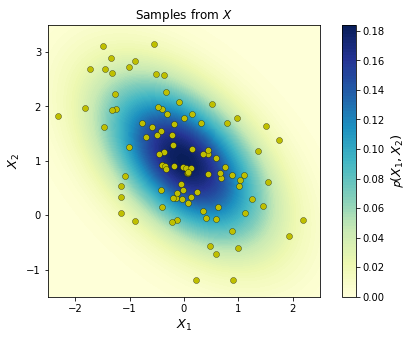

In [13]:
%matplotlib inline 
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    import numpy as np
    xm = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, xm).T.dot(xm)) / 2))

def surface(mean, covariance, d):
    """A function to generate surface for density."""
    import numpy as np
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec

fig, ax = plt.subplots(figsize=(8, 5))
# Plot bivariate distribution
x1, x2, p = surface(mean, cov, d)
con = ax.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
# Plot samples
ax.plot(X[0,:], X[1,:], 'yo', alpha=1,
        markeredgecolor='k', markeredgewidth=0.3)
ax.set_xlabel('$X_1$', fontsize=13)
ax.set_ylabel('$X_2$', fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect('equal')
ax.set_title('Samples from $X$')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('$\mathcal{p}(X_1, X_2)$', fontsize=13)
plt.show()
#